In [1]:
import warnings
warnings.filterwarnings('ignore')
import requests
from bs4 import BeautifulSoup
from datetime import datetime as dt


<!DOCTYPE html>
 <html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:de
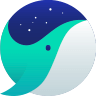
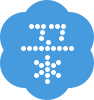

In [2]:
targetSite = 'https://www.naver.com/'
h = {'User-agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko'}
request = requests.get(targetSite, headers = h)
# print(request)
html = request.text
soup = BeautifulSoup(html)
print(soup)

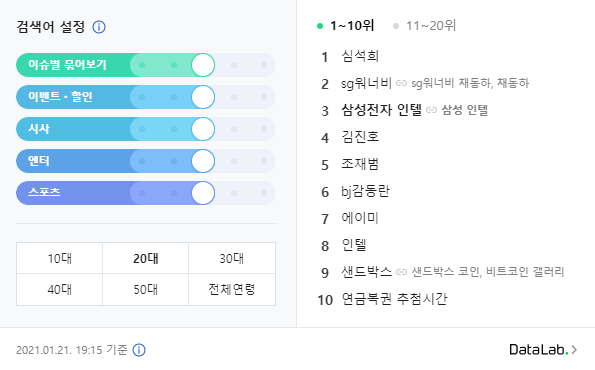

In [3]:
from IPython.display import Image
Image('./naver_1.png', width = '700')

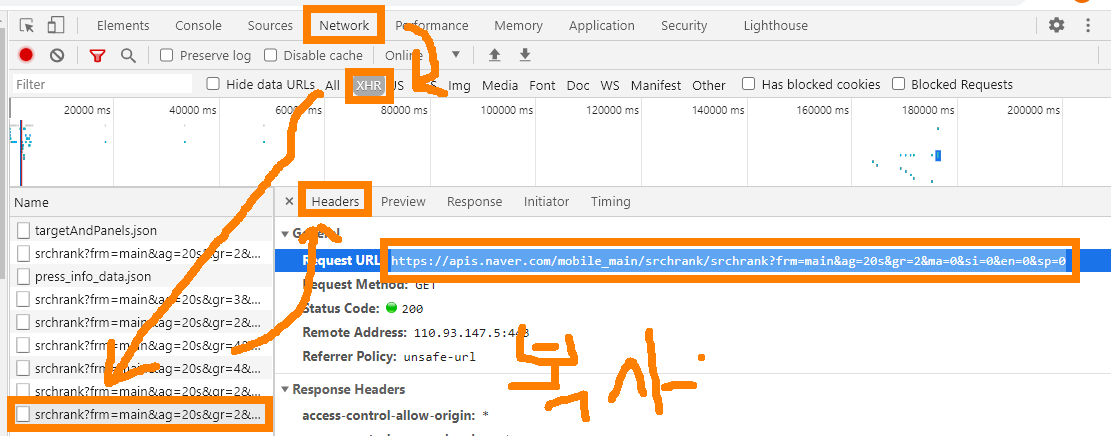

In [4]:
# 네이버 실시간 급상승 검색어 크롤링
# 2020년 3월쯤 네이버 실시간 검색어를 크롤링하는 방법이 변경되었다.
# 실시간 검색어가 웹 페이지에 포함돼 있었으나 현재는 웹 페이지에 포함되어있기 않고 AJAX를 이용해 받아오는 방식으로 변경되었다.
targetSite = 'https://apis.naver.com/mobile_main/srchrank/srchrank?frm=main&ag=20s&gr=2&ma=0&si=0&en=0&sp=0'
Image('./naver_2.png', width = '1200')

In [5]:
request = requests.get(targetSite, headers = h)
word = request.text
print(type(word))
print(word)

<class 'str'>
{"ts":"2021-01-21T19:49:00+0900","sm":"ag20sgrpma0si0en0sp0","rop":[{"ag":"20s"},{"gr":"02"},{"ma":"00"},{"si":"00"},{"en":"00"},{"sp":"00"}],"data":[{"rank":1,"keyword":"심석희","keyword_synonyms":[]},{"rank":2,"keyword":"조재범","keyword_synonyms":[]},{"rank":3,"keyword":"삼성전자 인텔","keyword_synonyms":["인텔"]},{"rank":4,"keyword":"bj감동란","keyword_synonyms":[]},{"rank":5,"keyword":"연금복권 추첨시간","keyword_synonyms":["연금복권","연금복권 720"]},{"rank":6,"keyword":"여에스더","keyword_synonyms":[]},{"rank":7,"keyword":"해운대 전복죽","keyword_synonyms":["부산 전복죽","소래포구 통큰칼국수","통큰칼국수"]},{"rank":8,"keyword":"석현준","keyword_synonyms":[]},{"rank":9,"keyword":"명량","keyword_synonyms":[]},{"rank":10,"keyword":"김진호","keyword_synonyms":["예술의여신"]},{"rank":11,"keyword":"에이미","keyword_synonyms":[]},{"rank":12,"keyword":"체리블렛","keyword_synonyms":[]},{"rank":13,"keyword":"감동란","keyword_synonyms":[]},{"rank":14,"keyword":"샌드박스","keyword_synonyms":["샌드박스 코인","비트코인 갤러리"]},{"rank":15,"keyword":"엠카운트다운","keyword_synonyms":[

In [6]:
# json 타입의 실시간 검색어를 딕셔너리로 변환하기 위해 json 모듈을 import 한다.
import json

In [7]:
# json 모듈에 loads() 메소드를 사용해서 json 형태의 데이터(문자열)을 딕셔너리로 변환한다.
searchWord = json.loads(word)
print(type(searchWord))
print(searchWord)

<class 'dict'>
{'ts': '2021-01-21T19:49:00+0900', 'sm': 'ag20sgrpma0si0en0sp0', 'rop': [{'ag': '20s'}, {'gr': '02'}, {'ma': '00'}, {'si': '00'}, {'en': '00'}, {'sp': '00'}], 'data': [{'rank': 1, 'keyword': '심석희', 'keyword_synonyms': []}, {'rank': 2, 'keyword': '조재범', 'keyword_synonyms': []}, {'rank': 3, 'keyword': '삼성전자 인텔', 'keyword_synonyms': ['인텔']}, {'rank': 4, 'keyword': 'bj감동란', 'keyword_synonyms': []}, {'rank': 5, 'keyword': '연금복권 추첨시간', 'keyword_synonyms': ['연금복권', '연금복권 720']}, {'rank': 6, 'keyword': '여에스더', 'keyword_synonyms': []}, {'rank': 7, 'keyword': '해운대 전복죽', 'keyword_synonyms': ['부산 전복죽', '소래포구 통큰칼국수', '통큰칼국수']}, {'rank': 8, 'keyword': '석현준', 'keyword_synonyms': []}, {'rank': 9, 'keyword': '명량', 'keyword_synonyms': []}, {'rank': 10, 'keyword': '김진호', 'keyword_synonyms': ['예술의여신']}, {'rank': 11, 'keyword': '에이미', 'keyword_synonyms': []}, {'rank': 12, 'keyword': '체리블렛', 'keyword_synonyms': []}, {'rank': 13, 'keyword': '감동란', 'keyword_synonyms': []}, {'rank': 14, 'keyword

In [8]:
# 딕셔너리에서 실시간 검색어만 얻어온다.
ranks = searchWord['data']
print(type(ranks))
print(ranks)

<class 'list'>
[{'rank': 1, 'keyword': '심석희', 'keyword_synonyms': []}, {'rank': 2, 'keyword': '조재범', 'keyword_synonyms': []}, {'rank': 3, 'keyword': '삼성전자 인텔', 'keyword_synonyms': ['인텔']}, {'rank': 4, 'keyword': 'bj감동란', 'keyword_synonyms': []}, {'rank': 5, 'keyword': '연금복권 추첨시간', 'keyword_synonyms': ['연금복권', '연금복권 720']}, {'rank': 6, 'keyword': '여에스더', 'keyword_synonyms': []}, {'rank': 7, 'keyword': '해운대 전복죽', 'keyword_synonyms': ['부산 전복죽', '소래포구 통큰칼국수', '통큰칼국수']}, {'rank': 8, 'keyword': '석현준', 'keyword_synonyms': []}, {'rank': 9, 'keyword': '명량', 'keyword_synonyms': []}, {'rank': 10, 'keyword': '김진호', 'keyword_synonyms': ['예술의여신']}, {'rank': 11, 'keyword': '에이미', 'keyword_synonyms': []}, {'rank': 12, 'keyword': '체리블렛', 'keyword_synonyms': []}, {'rank': 13, 'keyword': '감동란', 'keyword_synonyms': []}, {'rank': 14, 'keyword': '샌드박스', 'keyword_synonyms': ['샌드박스 코인', '비트코인 갤러리']}, {'rank': 15, 'keyword': '엠카운트다운', 'keyword_synonyms': []}, {'rank': 16, 'keyword': '쿠키런 킹덤', 'keyword_synonyms

In [9]:
# 실시간 검색어가 저장된 리스트에는 순위별로 각각 딕셔너리 타입으로 검색어가 저장되어 있다.
for rank in ranks:
    print('{0:2d}위 => {1} {2}'.format(rank['rank'], rank['keyword'], \
                                      rank['keyword_synonyms'] if len(rank['keyword_synonyms']) != 0 else ''))

 1위 => 심석희 
 2위 => 조재범 
 3위 => 삼성전자 인텔 ['인텔']
 4위 => bj감동란 
 5위 => 연금복권 추첨시간 ['연금복권', '연금복권 720']
 6위 => 여에스더 
 7위 => 해운대 전복죽 ['부산 전복죽', '소래포구 통큰칼국수', '통큰칼국수']
 8위 => 석현준 
 9위 => 명량 
10위 => 김진호 ['예술의여신']
11위 => 에이미 
12위 => 체리블렛 
13위 => 감동란 
14위 => 샌드박스 ['샌드박스 코인', '비트코인 갤러리']
15위 => 엠카운트다운 
16위 => 쿠키런 킹덤 
17위 => 롤토체스 4.5 
18위 => sg워너비 ['채동하']
19위 => 류화영 
20위 => 남연우 
